# 80 CEREALS ANALYSIS




# Which Cereal Is Healthy For Human Consumption

NAME: MONJOK JOSEPH TEREM
TRACK: DATA SCIENCE
TYPE: INTERN AT HAMOYE

Project Theme: Food Security And Access-To Prevent Malnutrition.

Project Kick-Off Date:Thursday,19th October,2023.

Project Deadline;Thursday,9th November,2023.

Team:Insight Hub.


Project Description:
    Our project,"Food Security and Access Analysis In Preventing Malnutrition,"is a comprehensive exploration of the food industry with a focus
    on cereals.In this Project,We aimed to examine the relationship between the nutritional content of cereals
    and its implications for food security and access.This EDA(Exploratory Data Analysis)
    helps address critical questions about the availability,affordability,and nutritional quality of cereals,which are a staple in many households.

# Content

Fields in the dataset

-Name:name of cereal
    
-mfr:manufacturer of cereal,
    A=American Home Food Products 
    G=General Mills
    K=Kelloggs 
    N=Nabisco
    P=Post 
    Q=Quaker 
    Oats
    R=Ralston Purina.
    
-Type:cold,hot.
    
-Calories:calories Per Saving
    
-Protein:grams of protein
    
-Fat:grams of fat
    
-Sodium:milligrans of Sodium
    
-Fiber:grams of fiber
    

-Carbo:grams of complex carbohydrates
    
-Sugars:grams of sugars
    
-Potass:milligrams of Potassium(K)
    
-Vitamins:Vitamins and Minerals:0,25 or 100,indicating the typical persentage of FDA recommended.
        
-Shelf:display shelf(1,2 or 3,counting from the floor )
    
-Weight: weight in ounces of one serving
    
-Cups:number of cups in one serving
    
-rating:a rating of the Cereals(possibly from Consumer Reports?)
    
    
(https://www.kaggle.com/code/mashhar/data-preprocessing-visualization-model-learning)

# Importing The Necessary Libraries for This Project

In [42]:
import pandas as pd
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso



print("Set_Up,Completed.")


Set_Up,Completed.


# Importing The DataSet

In [179]:
# file_path="C:\\Users\\Monjok J\\Downloads\\cereal.csv"
cereal_df=pd.read_csv(file_path)
print(cereal_df)


                                      name mfr type  calories  protein  fat  \
0                                100% Bran   N    C        70        4    1   
1                        100% Natural Bran   Q    C       120        3    5   
2                                 All-Bran   K    C        70        4    1   
3                All-Bran with Extra Fiber   K    C        50        4    0   
4                           Almond Delight   R    C       110        2    2   
5                  Apple Cinnamon Cheerios   G    C       110        2    2   
6                              Apple Jacks   K    C       110        2    0   
7                                  Basic 4   G    C       130        3    2   
8                                Bran Chex   R    C        90        2    1   
9                              Bran Flakes   P    C        90        3    0   
10                            Cap'n'Crunch   Q    C       120        1    2   
11                                Cheerios   G    C 

# Some Basic Data Cleaning And Preprocessing

In [76]:
cereal_df.head(20)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,brand,ingredient_count
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,Nabisco,506.0
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679,Quaker Oats,296.0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505,Kelloggs,676.0
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912,Kelloggs,546.0
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843,Ralston Purina,336.0
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541,General Mills,386.0
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094,Kelloggs,293.0
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562,General Mills,473.0
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253,Ralston Purina,443.0
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813,Post,516.0


In [44]:
cereal_df.tail(20)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.00,0.67,50.828392
58,Raisin Bran,K,C,120,3,1,210,5.0,14.0,12,240,25,2,1.33,0.75,39.259197
59,Raisin Nut Bran,G,C,100,3,2,140,2.5,10.5,8,140,25,3,1.00,0.50,39.703400
60,Raisin Squares,K,C,90,2,0,0,2.0,15.0,6,110,25,3,1.00,0.50,55.333142
61,Rice Chex,R,C,110,1,0,240,0.0,23.0,2,30,25,1,1.00,1.13,41.998933
62,Rice Krispies,K,C,110,2,0,290,0.0,22.0,3,35,25,1,1.00,1.00,40.560159
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
66,Smacks,K,C,110,2,1,70,1.0,9.0,15,40,25,2,1.00,0.75,31.230054


In [77]:
cereal_df.shape

(77, 18)

In [78]:
cereal_df.columns
print(cereal_df.columns)

cereal_df.columns.nunique()

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating', 'brand', 'ingredient_count'],
      dtype='object')


18

In [79]:
cereal_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,ingredient_count
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705,389.866234
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289,116.461306
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851,79.000000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094,321.000000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208,396.000000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392,452.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912,676.000000


In [80]:
cereal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              77 non-null     object 
 1   mfr               77 non-null     object 
 2   type              77 non-null     object 
 3   calories          77 non-null     int64  
 4   protein           77 non-null     int64  
 5   fat               77 non-null     int64  
 6   sodium            77 non-null     int64  
 7   fiber             77 non-null     float64
 8   carbo             77 non-null     float64
 9   sugars            77 non-null     int64  
 10  potass            77 non-null     int64  
 11  vitamins          77 non-null     int64  
 12  shelf             77 non-null     int64  
 13  weight            77 non-null     float64
 14  cups              77 non-null     float64
 15  rating            77 non-null     float64
 16  brand             77 non-null     object 
 17 

In [81]:
cereal_df.isna().sum()

name                0
mfr                 0
type                0
calories            0
protein             0
fat                 0
sodium              0
fiber               0
carbo               0
sugars              0
potass              0
vitamins            0
shelf               0
weight              0
cups                0
rating              0
brand               0
ingredient_count    0
dtype: int64

# Cartegorizing Manufacturers With Their Brands As Well With An Ingredient Count And Ingredients That Make Up The Brand

In [82]:

from tabulate import tabulate

In [188]:
#Creating A Mapping
manufacturer_mapping={'A':'American Home Food Products',
                     'G':'General Mills',
                     'K':'Kelloggs',
                     'N':'Nabisco',
                     'P':'Post',
                     'Q':'Quaker Oats',
                     'R':'Ralston Purina'}
cereal_df['brand']=cereal_df['mfr'].map(manufacturer_mapping)
print(cereal_df['brand'])


0                         Nabisco
1                     Quaker Oats
2                        Kelloggs
3                        Kelloggs
4                  Ralston Purina
5                   General Mills
6                        Kelloggs
7                   General Mills
8                  Ralston Purina
9                            Post
10                    Quaker Oats
11                  General Mills
12                  General Mills
13                  General Mills
14                  General Mills
15                 Ralston Purina
16                       Kelloggs
17                       Kelloggs
18                  General Mills
19                       Kelloggs
20                        Nabisco
21                       Kelloggs
22                  General Mills
23                 Ralston Purina
24                       Kelloggs
25                       Kelloggs
26                       Kelloggs
27                           Post
28                       Kelloggs
29            

In [185]:
ingredient_columns=['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']

cereal_df['ingredient_count']=cereal_df[ingredient_columns].sum(axis=1)

In [193]:
insights_df=cereal_df[['name',"brand",'ingredient_count']]
insights_df

,name,brand,ingredient_count
0,100% Bran,Nabisco,531.0
1,100% Natural Bran,Quaker Oats,296.0
2,All-Bran,Kelloggs,701.0
3,All-Bran with Extra Fiber,Kelloggs,571.0
4,Almond Delight,Ralston Purina,361.0
5,Apple Cinnamon Cheerios,General Mills,411.0
6,Apple Jacks,Kelloggs,318.0
7,Basic 4,General Mills,498.0
8,Bran Chex,Ralston Purina,468.0
9,Bran Flakes,Post,541.0


In [194]:
print(insights_df.head(20))

                         name           brand  ingredient_count
0                   100% Bran         Nabisco             531.0
1           100% Natural Bran     Quaker Oats             296.0
2                    All-Bran        Kelloggs             701.0
3   All-Bran with Extra Fiber        Kelloggs             571.0
4              Almond Delight  Ralston Purina             361.0
5     Apple Cinnamon Cheerios   General Mills             411.0
6                 Apple Jacks        Kelloggs             318.0
7                     Basic 4   General Mills             498.0
8                   Bran Chex  Ralston Purina             468.0
9                 Bran Flakes            Post             541.0
10               Cap'n'Crunch     Quaker Oats             427.0
11                   Cheerios   General Mills             558.0
12      Cinnamon Toast Crunch   General Mills             426.0
13                   Clusters   General Mills             407.0
14                Cocoa Puffs   General 

In [195]:
print(tabulate(insights_df,headers='keys',tablefmt='psql'))

+----+----------------------------------------+-----------------------------+--------------------+
|    | name                                   | brand                       |   ingredient_count |
|----+----------------------------------------+-----------------------------+--------------------|
|  0 | 100% Bran                              | Nabisco                     |              531   |
|  1 | 100% Natural Bran                      | Quaker Oats                 |              296   |
|  2 | All-Bran                               | Kelloggs                    |              701   |
|  3 | All-Bran with Extra Fiber              | Kelloggs                    |              571   |
|  4 | Almond Delight                         | Ralston Purina              |              361   |
|  5 | Apple Cinnamon Cheerios                | General Mills               |              411   |
|  6 | Apple Jacks                            | Kelloggs                    |              318   |
|  7 | Bas

In [196]:
insights_df=cereal_df.pivot_table(index=['name','brand'],values=ingredient_columns,aggfunc='mean')
insights_df.reset_index(inplace=True)
insights_df.head(50)


,name,brand,calories,carbo,fat,fiber,potass,protein,sodium,sugars,vitamins
0,100% Bran,Nabisco,70,5.0,1,10.0,280,4,130,6,25
1,100% Natural Bran,Quaker Oats,120,8.0,5,2.0,135,3,15,8,0
2,All-Bran,Kelloggs,70,7.0,1,9.0,320,4,260,5,25
3,All-Bran with Extra Fiber,Kelloggs,50,8.0,0,14.0,330,4,140,0,25
4,Almond Delight,Ralston Purina,110,14.0,2,1.0,-1,2,200,8,25
5,Apple Cinnamon Cheerios,General Mills,110,10.5,2,1.5,70,2,180,10,25
6,Apple Jacks,Kelloggs,110,11.0,0,1.0,30,2,125,14,25
7,Basic 4,General Mills,130,18.0,2,2.0,100,3,210,8,25
8,Bran Chex,Ralston Purina,90,15.0,1,4.0,125,2,200,6,25
9,Bran Flakes,Post,90,13.0,0,5.0,190,3,210,5,25


In [197]:
insights_df.tail(27)

,name,brand,calories,carbo,fat,fiber,potass,protein,sodium,sugars,vitamins
50,Nutri-grain Wheat,Kelloggs,90,18.0,0,3.0,90,3,170,2,25
51,Oatmeal Raisin Crisp,General Mills,130,13.5,2,1.5,120,3,170,10,25
52,Post Nat. Raisin Bran,Post,120,11.0,1,6.0,260,3,200,14,25
53,Product 19,Kelloggs,100,20.0,0,1.0,45,3,320,3,100
54,Puffed Rice,Quaker Oats,50,13.0,0,0.0,15,1,0,0,0
55,Puffed Wheat,Quaker Oats,50,10.0,0,1.0,50,2,0,0,0
56,Quaker Oat Squares,Quaker Oats,100,14.0,1,2.0,110,4,135,6,25
57,Quaker Oatmeal,Quaker Oats,100,-1.0,2,2.7,110,5,0,-1,0
58,Raisin Bran,Kelloggs,120,14.0,1,5.0,240,3,210,12,25
59,Raisin Nut Bran,General Mills,100,10.5,2,2.5,140,3,140,8,25


# Classifying Cerals Based On Their Nutritional Value For Adults,Children,Babies and Pregnant Women

In [294]:
#creating columns to cartegorizecerals
cereal_df['Cartegory']='Adult'

In [295]:
cereal_df.loc[cereal_df['sugars']<=5,'Category']='Children'
cereal_df.loc[cereal_df['calories']<=100,'Category']='Baby'
cereal_df.loc[cereal_df['protein']>=5,'Category']='Pregnant Women'



#counting the number of cereals in each category
category_counts=cereal_df['Category'].value_counts()

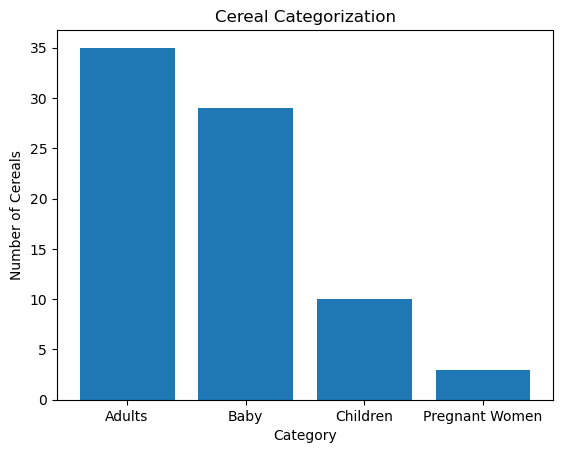

In [296]:
plt.bar(category_counts.index,category_counts.values)
plt.xlabel('Category')
plt.ylabel('Number of Cereals')
plt.title('Cereal Categorization')
plt.show()

In [297]:
baby_cereals=cereal_df[cereal_df['Category']=='Baby']
print('Cereals Suitable For Babies:')
print(baby_cereals[['name','Category']])

Cereals Suitable For Babies:
                         name Category
0                   100% Bran     Baby
2                    All-Bran     Baby
3   All-Bran with Extra Fiber     Baby
8                   Bran Chex     Baby
9                 Bran Flakes     Baby
16                Corn Flakes     Baby
20     Cream of Wheat (Quick)     Baby
22     Crispy Wheat & Raisins     Baby
23                Double Chex     Baby
26        Frosted Mini-Wheats     Baby
30               Golden Crisp     Baby
32          Grape Nuts Flakes     Baby
41                       Life     Baby
43                      Maypo     Baby
47       Multi-Grain Cheerios     Baby
50          Nutri-grain Wheat     Baby
53                 Product 19     Baby
54                Puffed Rice     Baby
55               Puffed Wheat     Baby
56         Quaker Oat Squares     Baby
59            Raisin Nut Bran     Baby
60             Raisin Squares     Baby
63             Shredded Wheat     Baby
64     Shredded Wheat 'n'Bran     B

In [298]:
children_cereals=cereal_df[cereal_df['Category']=='Children']
print('Cereals Suitable For Children:')
print(children_cereals[['name','Category']])

Cereals Suitable For Children:
                  name  Category
15           Corn Chex  Children
19  Cracklin' Oat Bran  Children
21             Crispix  Children
33          Grape-Nuts  Children
34  Great Grains Pecan  Children
40                 Kix  Children
61           Rice Chex  Children
62       Rice Krispies  Children
69   Total Corn Flakes  Children
72             Triples  Children


In [300]:
adult_cereals=cereal_df[cereal_df['Category']=='Adult']
print('Cereals Suitable For Adults:')
print(adult_cereals[['name','Category']])

Cereals Suitable For Adults:
Empty DataFrame
Columns: [name, Category]
Index: []


In [292]:
pregnant_women_cereals=cereal_df[cereal_df['Category']=='Pregnant Women']
print('Cereals Suitable For Pregnant Women:')
print(pregnant_women_cereals[['name','Category']])

Cereals Suitable For Pregnant Women:
              name        Category
11        Cheerios  Pregnant Women
57  Quaker Oatmeal  Pregnant Women
67       Special K  Pregnant Women


# Classifying Cereals Based On Their Sugar and Fiber Content

In [265]:
high_sugar_threshold=9
low_fiber_threshold=3

cereal_df["Group"]=""
cereal_df.loc[cereal_df['sugars']>high_sugar_threshold,'Group']='High Sugar(Diabetes Risk)'
cereal_df.loc[cereal_df['fiber']<low_fiber_threshold,'Group']='Low Fiber(Health Risk)'
cereal_df.loc[(cereal_df['sugars']<=high_sugar_threshold)&(cereal_df['fiber']>=low_fiber_threshold),'Group']='Moderate'


    
    
    


Low Fiber(Health Risk)       50
Moderate                     19
High Sugar(Diabetes Risk)     8
Name: Group, dtype: int64


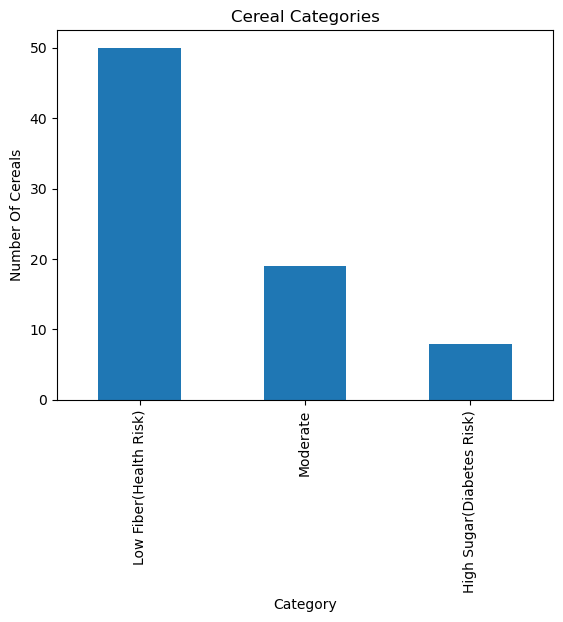

In [250]:
group_counts=cereal_df['Group'].value_counts()
print(group_counts)

group_counts.plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Number Of Cereals")
plt.title("Cereal Categories")
plt.show()

In [251]:
moderate_cereals=cereal_df[cereal_df['Group']=='Moderate']
print(moderate_cereals[['name','Group']])

                         name     Group
0                   100% Bran  Moderate
2                    All-Bran  Moderate
3   All-Bran with Extra Fiber  Moderate
8                   Bran Chex  Moderate
9                 Bran Flakes  Moderate
19         Cracklin' Oat Bran  Moderate
26        Frosted Mini-Wheats  Moderate
32          Grape Nuts Flakes  Moderate
33                 Grape-Nuts  Moderate
34         Great Grains Pecan  Moderate
49  Nutri-Grain Almond-Raisin  Moderate
50          Nutri-grain Wheat  Moderate
63             Shredded Wheat  Moderate
64     Shredded Wheat 'n'Bran  Moderate
65  Shredded Wheat spoon size  Moderate
68    Strawberry Fruit Wheats  Moderate
71          Total Whole Grain  Moderate
74                 Wheat Chex  Moderate
75                   Wheaties  Moderate


In [252]:
High_Risk_Diabetic_cereals=cereal_df[cereal_df['Group']=='High Sugar(Diabetes Risk)']
print(High_Risk_Diabetic_cereals[['name','Group']])

                                      name                      Group
27  Fruit & Fibre Dates; Walnuts; and Oats  High Sugar(Diabetes Risk)
28                           Fruitful Bran  High Sugar(Diabetes Risk)
44        Muesli Raisins; Dates; & Almonds  High Sugar(Diabetes Risk)
45       Muesli Raisins; Peaches; & Pecans  High Sugar(Diabetes Risk)
46                    Mueslix Crispy Blend  High Sugar(Diabetes Risk)
52                   Post Nat. Raisin Bran  High Sugar(Diabetes Risk)
58                             Raisin Bran  High Sugar(Diabetes Risk)
70                       Total Raisin Bran  High Sugar(Diabetes Risk)


In [253]:
Low_Fibre_cereals=cereal_df[cereal_df['Group']=='Low Fiber(Health Risk)']
print(Low_Fibre_cereals[['name','Group']])

                           name                   Group
1             100% Natural Bran  Low Fiber(Health Risk)
4                Almond Delight  Low Fiber(Health Risk)
5       Apple Cinnamon Cheerios  Low Fiber(Health Risk)
6                   Apple Jacks  Low Fiber(Health Risk)
7                       Basic 4  Low Fiber(Health Risk)
10                 Cap'n'Crunch  Low Fiber(Health Risk)
11                     Cheerios  Low Fiber(Health Risk)
12        Cinnamon Toast Crunch  Low Fiber(Health Risk)
13                     Clusters  Low Fiber(Health Risk)
14                  Cocoa Puffs  Low Fiber(Health Risk)
15                    Corn Chex  Low Fiber(Health Risk)
16                  Corn Flakes  Low Fiber(Health Risk)
17                    Corn Pops  Low Fiber(Health Risk)
18                Count Chocula  Low Fiber(Health Risk)
20       Cream of Wheat (Quick)  Low Fiber(Health Risk)
21                      Crispix  Low Fiber(Health Risk)
22       Crispy Wheat & Raisins  Low Fiber(Healt

# Categorizing The Cereals As Cold Or Hot Cereal Types

In [254]:
cold_cereals=cereal_df.loc[cereal_df['type']=='C']





In [255]:
cereal_df.loc[cereal_df['type']=='H']


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,...,shelf,weight,cups,rating,ingredient_count,brand,Cartegory,Category,Group,Rating Category
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,...,2,1.0,1.00,64.533816,204.0,Nabisco,,Adults,Low Fiber(Health Risk),Average
43,Maypo,A,H,100,4,1,0,0.0,16.0,3,...,2,1.0,1.00,54.850917,244.0,American Home Food Products,,Adults,Low Fiber(Health Risk),Below Average
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,...,1,1.0,0.67,50.828392,217.7,Quaker Oats,,Adults,Low Fiber(Health Risk),Below Average


In [256]:
if len(group)>0:
    for cereal_name in group['name']:
        print(group['name'].to_string(index=False))
        print(cereal_name)

                100% Bran
                 All-Bran
All-Bran with Extra Fiber
                Bran Chex
              Bran Flakes
       Cracklin' Oat Bran
      Frosted Mini-Wheats
        Grape Nuts Flakes
               Grape-Nuts
       Great Grains Pecan
Nutri-Grain Almond-Raisin
        Nutri-grain Wheat
           Shredded Wheat
   Shredded Wheat 'n'Bran
Shredded Wheat spoon size
  Strawberry Fruit Wheats
        Total Whole Grain
               Wheat Chex
                 Wheaties
100% Bran
                100% Bran
                 All-Bran
All-Bran with Extra Fiber
                Bran Chex
              Bran Flakes
       Cracklin' Oat Bran
      Frosted Mini-Wheats
        Grape Nuts Flakes
               Grape-Nuts
       Great Grains Pecan
Nutri-Grain Almond-Raisin
        Nutri-grain Wheat
           Shredded Wheat
   Shredded Wheat 'n'Bran
Shredded Wheat spoon size
  Strawberry Fruit Wheats
        Total Whole Grain
               Wheat Chex
                 Wheaties
Al

# Categorizing Cereals Based On Their Ratings

In [257]:
#Defining Rating Range
excellent_range=(90,100)
better_range=(80,89)
good_range=(70,79)
average_range=(60,69)
below_average_range=(0,59)

#creating a new column for rating categories
cereal_df['Rating Category']='Not Specified'

#categorizing cerals based ontheir ratings
cereal_df.loc[cereal_df['rating'].between(*excellent_range),'Rating Category']='Excellent'
cereal_df.loc[cereal_df['rating'].between(*better_range),'Rating Category']='Good'
cereal_df.loc[cereal_df['rating'].between(*good_range),'Rating Category']='Better'
cereal_df.loc[cereal_df['rating'].between(*average_range),'Rating Category']='Average'
cereal_df.loc[cereal_df['rating'].between(*below_average_range),'Rating Category']='Below Average'


excellent_cereals=cereal_df[cereal_df['Rating Category']=='Excellent']
better_cereals=cereal_df[cereal_df['Rating Category']=='Better']
good_cereals=cereal_df[cereal_df['Rating Category']=='Good']
average_cereals=cereal_df[cereal_df['Rating Category']=='Average']
below_average_cereals=cereal_df[cereal_df['Rating Category']=='Below Average']





print('Excellent Cereals:')
print(excellent_cereals[['name','rating']])

print('\nGood Cereals:')
print(good_cereals[['name','rating']])

print('\nBetter Cereals:')
print(better_cereals[['name','rating']])


print('\nAverage Cereals:')
print(average_cereals[['name','rating']])

print('\nBelow Average  Cereals:')
print(below_average_cereals[['name','rating']])

Excellent Cereals:
                        name     rating
3  All-Bran with Extra Fiber  93.704912

Good Cereals:
Empty DataFrame
Columns: [name, rating]
Index: []

Better Cereals:
                         name     rating
64     Shredded Wheat 'n'Bran  74.472949
65  Shredded Wheat spoon size  72.801787

Average Cereals:
                      name     rating
0                100% Bran  68.402973
20  Cream of Wheat (Quick)  64.533816
54             Puffed Rice  60.756112
55            Puffed Wheat  63.005645
63          Shredded Wheat  68.235885

Below Average  Cereals:
                                      name     rating
1                        100% Natural Bran  33.983679
4                           Almond Delight  34.384843
5                  Apple Cinnamon Cheerios  29.509541
6                              Apple Jacks  33.174094
7                                  Basic 4  37.038562
8                                Bran Chex  49.120253
9                              Bran Flakes  53.

# Below Is A Concise Conclusion Based On The DataSet:


1.The DataSet Contains 77 Columns and 18 Rows,Offering A comprehensive View of Various Cereal Attributes

2.There Are (7) Main Manufacturers Associated With The Cereals Found In This DataSet.They Are As Follows:
A=American Home Food Products
G=General Mills
K=Kelloggs
N=Nabisco
P=Post
Q=Quaker Oats
R=Ralston Purina.

3.Out Of All The Cereals Present In The Dataset, It Was Found That (3) Of Them,Are Best Served Hot.While The Majority Are Best Served Cold. The Ones Best Served Hot Are:Quaker Oats Meal,Maypo and,Cream Of Wheat(Quick).

4.It Is Evident That The Most Of The Cereals In The DataSet Are More Suitable For Adults And mostlikely babies,As not all May Meet The Nutritional Needs Of Children And Pregnant Women.

5.There Is A Potential Opportunity For Manufacturers To Consider more friendly Family-Based Marketing And Insurance Policies To Ensure Cereal Accessibility For Everyone,Especially For Pregnant Women and babies.

4.Notably,8 Cereals Exhibit High Sugar Content And May Pose A Risk Of Diabetes.On The Other Hand,About 19 Cereals Are Categorized As "Moderate,"And As A Significant Number (50) Have Lower Fibre Content,Which Is A Health Concern Which Is Not Okay Because Fibres Offers A Range Of Health Benefits When Invluded In Our(Your) Diet. Such are in Weight Management,Blood Sugar Control,Colon Health,Heart Health,Nutrient Absorption and amongst Many Others.


